# Data Wrangling


## Introduction
>In this lesson, we have learned numerous techniques to gather, assess and clean data programmatically. These skills are exceptionally useful since data in real-world is rarely comes clean. This is the work that needs to be done in the background before nice data visualization and machine learning models can be effectively produced. 

>In this project, we gathered data from different sources and in many formats, assess the data's quality and tidiness and programmatically clean it using common python data science packages (numpy, pandas, matplotlib, and seaborn). 

>The first dataset is the tweet archive of Twitter user @dog_Rates, also known for WeRateDogs, which is a twitter account that rates peoples' dogs with humerous comment about the dog. The rating are out of 10. However, the rating can go beyond that, which is the unique feature for this account. This dataset contains basic tweet data (tweet ID, timestamp, text, and etc.) for over 5000+ tweets.

>The goal of this project is to create interesting and trushworthy analyses and visualizations from this Twitter archive. This will be accomplished by gather more data such as dog's image classification using convolutional neural network to predict dog breed and also additional data with Twitter API. 

## Project Details

>1) Wrangle the data including (gather, assess and clean)

>2) Store, analyze and visualize the data

>3) Data Wrangling Report and Data Analyses/Visualization Report

## Additional Datasets

### Image Predictions File

>The file contains tweet image predictions of the dog's breed or other object using convolutional neural network. The file(image_prediction.tsv) is hosted on Udacity's servers. It was downloadded programmatically using the Requests library through the given URL.

### Additional Data via the Twitter API

>Each tweet's retweet count, favorite count, retweet date, retweet's user information were extracted from the Twitter API using Tweepy library. The data is stored as JSON and as txt file. The file is read to pandas Dataframe and joined with other datasets.

Required libraries are imported

In [10]:
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import time

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Gather

### 1. Twitter Archived Enhanced Data

In [11]:
df = pd.read_csv('./twitter-archive-enhanced.csv')

The data is assessed programmatically to help understand the dataset and observe missing values 

In [12]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

The list of tweet_id is stored as a variable to later be used to gather additional data by Twitter API 

In [14]:
tweet_ids = df['tweet_id']

## 2. Image Predictions Data

In [16]:
#by using the request library and the given urls we are able to write out the file as flatfile and import to our workspace
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('./image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    
df_image_pred = pd.read_csv('./image_predictions.tsv', sep = '\t')

Assess the data programmatically

In [17]:
df_image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Check for null values

In [18]:
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## 3. Additional Data from Twitter API

In [19]:
#using tweepy API to obtain additional data
#all the user's related information are erased for privacy purpose
consumer_key = 
consumer_secret = 
access_token = 
access_secret = 

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [20]:
# creating a list for tweets with exceptions/errors 
tweets_error_list = []

# List of tweets
df_tweets = []

# start time of execution
start = time.time()

# For loop which will add each available tweet json to df_list
for tweet_id in tweet_ids:
    try:
        tweet = api.get_status(tweet_id, tweet_mode= 'extended')._json 
        
        favorites = tweet['favorite_count'] # number of favorites for the tweet
        retweets = tweet['retweet_count'] # number of retweets
        user_followers = tweet['user']['followers_count'] # number of followers of the user who tweeted
        user_favourites = tweet['user']['favourites_count'] # number of favourites for the user who tweeted
        date_time = tweet['created_at'] # the timestamp i.e. date and time of creation of the tweet
        
        df_tweets.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        tweets_error_list.append(tweet_id)
        
# end time for excution
end = time.time()

#printing time for execution
print("Total time taken for execution", end - start)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 _ [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778 _ [{'code

Assess the data programmatically and visually and Load to the workspace as .txt file

In [21]:
#convert json datatype to pandas dataframe and store as .txt 
df_tweets_json = pd.DataFrame(df_tweets)

df_tweets_json.to_csv('tweet_json.txt', encoding= 'utf-8', index=False)

In [22]:
#assess the data
df_tweets[:2]

[{'tweet_id': 892420643555336193,
  'favorites': 35251,
  'retweets': 7434,
  'user_followers': 8943067,
  'user_favourites': 146211,
  'date_time': Timestamp('2017-08-01 16:23:56')},
 {'tweet_id': 892177421306343426,
  'favorites': 30517,
  'retweets': 5529,
  'user_followers': 8943067,
  'user_favourites': 146211,
  'date_time': Timestamp('2017-08-01 00:17:27')}]

In [23]:
df_tweets_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
date_time          2331 non-null datetime64[ns]
favorites          2331 non-null int64
retweets           2331 non-null int64
tweet_id           2331 non-null int64
user_favourites    2331 non-null int64
user_followers     2331 non-null int64
dtypes: datetime64[ns](1), int64(5)
memory usage: 109.3 KB


In [24]:
#load the data / assess
tweet_df = pd.read_csv('tweet_json.txt')
tweet_df.head()

,date_time,favorites,retweets,tweet_id,user_favourites,user_followers
0,2017-08-01 16:23:56,35251,7434,892420643555336193,146211,8943067
1,2017-08-01 00:17:27,30517,5529,892177421306343426,146211,8943067
2,2017-07-31 00:18:03,22944,3648,891815181378084864,146211,8943067
3,2017-07-30 15:58:51,38538,7612,891689557279858688,146211,8943067
4,2017-07-29 16:00:24,36814,8193,891327558926688256,146211,8943067


In [25]:
df_nuniques = [(col, tweet_df[col].nunique()) for col in tweet_df]

The columns user_favorites contains 2 unique values, not really telling us much variability in the data

In [26]:
df_nuniques

[('date_time', 2331),
 ('favorites', 1988),
 ('retweets', 1671),
 ('tweet_id', 2331),
 ('user_favourites', 3),
 ('user_followers', 34)]

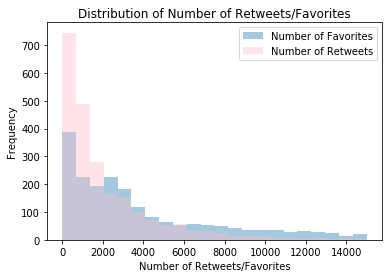

In [27]:
tweet_df.favorites.hist(range=(0,15000), bins=22, grid=False, alpha=0.4, label='Number of Favorites')
tweet_df.retweets.hist(range = (0,15000), bins=22,grid=False, alpha=0.4, color='pink', label='Number of Retweets')
plt.legend()
plt.title('Distribution of Number of Retweets/Favorites')
plt.xlabel('Number of Retweets/Favorites')
plt.ylabel('Frequency');

The retweet and favorties data follows a low lambda value of poisson distribution. However, the favorites data has a longer tail than the retweets meaning the value are generally higher. 

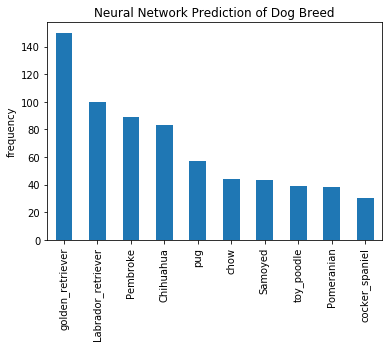

In [28]:
#assess the most common prediction data visually
df_image_pred.p1.value_counts()[:10].plot(kind='bar', color=sb.color_palette()[0])
plt.ylabel('frequency')
plt.title('Neural Network Prediction of Dog Breed');

The top 3 dog breeds are golden_retriever, labrador_retriever, and pembroke. 

## Quality Issues

**df_twitter_enhanced dataframe**

> timestamp column needed to be datetime object instead of string

> in_reply_to_status_id, in_reply_user_id, retweeted_status_id, retweeted_status_user_id should be int instead of float

> datetime and timestamp columns are repeated

> tweet text needed to be normalized in order to extract information from

> gender column needed to be engineered in order to perform further analysis

> tweet_length needed to be engineered in order to perform further analysis

> source column needed to be clean to remove url information

**df_image_pred dataframe**

> p1, p2, p3 needed to be merged to one as well as p1_conf, p2_conf, p3_conf

> p1_dog, p2_dog, p3_dog are not needed, we only need one most confident dog breed prediction instead of 3 values

> img number are not needed since the model prediction result is in the file


**df_api_data dataframe**

> datetime column is string which should be converted to datetime

> in_reply_to_user_id contains only one unique value, which does not explain any variability of the data, needed to be dropped

## Tidiness Issues

> 3 datasets needed to be merged

> date_time data from the additional API data and timestamp from archive data are repeated

> in image prediction data p1,p2,p3 and p1_conf, p2_conf, p3_conf needed to be merged 




## Cleaning

#### Define

The 3 datasets from different sources needed to be combined to perform further analysis

#### Code

In [29]:
#merge 3 datasets
df_master = (df.merge(tweet_df,how = 'inner', on = 'tweet_id')).merge(df_image_pred,how='inner', on = 'tweet_id')

#### Test

In [30]:
df_master.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'date_time', 'favorites', 'retweets', 'user_favourites',
       'user_followers', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [31]:
df_master.shape

(2059, 33)

#### Define

The timestamp and datetime are identical and needed to be removed

#### Code

In [32]:
df_master['timestamp'] = pd.to_datetime(df_master['timestamp'])
df_master['date_time'] = pd.to_datetime(df_master['date_time'])

In [33]:
df_master[['timestamp', 'date_time']].head()

,timestamp,date_time
0,2017-08-01 16:23:56,2017-08-01 16:23:56
1,2017-08-01 00:17:27,2017-08-01 00:17:27
2,2017-07-31 00:18:03,2017-07-31 00:18:03
3,2017-07-30 15:58:51,2017-07-30 15:58:51
4,2017-07-29 16:00:24,2017-07-29 16:00:24


In [34]:
df_master[df_master['timestamp'] != df_master['date_time']] #these are the same so we can drop one column

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [35]:
df_master.drop(columns = 'timestamp', inplace=True)

#### Test 

In [36]:
df_master.shape #one less column due to dropped timestamp column

(2059, 32)

#### Define

p1,p2,p3 and p1_conf, p2_conf, and p3_conf needed to be selected based on whether the prediction is for dog's breed or not

In [37]:
df_master.iloc[:,22:].head()

,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


#### Code

In [38]:
def prediction_confidence(df):
    predictions = []
    confidences = []
    for i in range(len(df_master)):
        if df.iloc[i,:]['p1_dog'] == True:
            predictions.append(df.iloc[i,:]['p1'])
            confidences.append(df.iloc[i,:]['p1_conf'])
        elif df.iloc[i,:]['p2_dog'] == True:
            predictions.append(df.iloc[i,:]['p2'])
            confidences.append(df.iloc[i,:]['p2_conf'])
        elif df.iloc[i,:]['p3_dog'] == True:
            predictions.append(df.iloc[i,:]['p3'])
            confidences.append(df.iloc[i,:]['p3_conf'])
        else:
            predictions.append(np.nan)
            confidences.append(0)
    return predictions, confidences

In [39]:
predictions, confidences = prediction_confidence(df_master)

In [40]:
df_master['predictions'] = predictions
df_master['confidences'] = confidences

In [41]:
df_master = df_master.drop(columns = ['p1','p2','p3','p1_conf','p2_conf','p3_conf','p1_dog','p2_dog','p3_dog'])

#### Test 

In [42]:
df_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,puppo,date_time,favorites,retweets,user_favourites,user_followers,jpg_url,img_num,predictions,confidences
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,...,None,2017-08-01 16:23:56,35251,7434,146211,8943067,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,0.000000
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,...,None,2017-08-01 00:17:27,30517,5529,146211,8943067,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,...,None,2017-07-31 00:18:03,22944,3648,146211,8943067,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012
3,891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,...,None,2017-07-30 15:58:51,38538,7612,146211,8943067,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086
4,891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,...,None,2017-07-29 16:00:24,36814,8193,146211,8943067,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712


#### Define 

Source column needed to be clean to extract the tweet source

In [43]:
df_master['source'][0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

#### Code

In [44]:
df_master['source'] = df_master['source'].apply(lambda source : re.findall(pattern = '>(.*)<',string = source)[0])

#### Test

In [45]:
df_master.source.value_counts()

Twitter for iPhone    2019
Twitter Web Client      30
TweetDeck               10
Name: source, dtype: int64

Most source are from iPhone and less than 3 percent comes from either webclient or tweetdeck(for multipl accounts management),
makes me question whether if the tweet is from Andriod is that grouped together with "Twitter for iPhone" category?

#### Define

Twitter text needed to be normalized and process in order to perform further analysis

#### Code

Basic Natural Langauge Process Pipeline, from normalizing, splitting, stop word removing, and lemmatizing(stemming).\

In [46]:
def normalized_text(text):
    normalized_text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
    return normalized_text

In [47]:
def split_text(text):
    splited_text = text.split()
    return splited_text

In [48]:
def remove_stop_words(text):
    if text not in stopwords.words("english"):
        return text

In [49]:
def lemmatization(text):
    clean_text = WordNetLemmatizer().lemmatize(text) 
    return clean_text

In [50]:
normalized_texts = df_master.text.apply(normalized_text).apply(split_text).apply(remove_stop_words)

In [51]:
sentences = []
for i in range(len(normalized_texts)):
    words = [WordNetLemmatizer().lemmatize(w) for w in normalized_texts[i]]
    sentences.append(words)

In [52]:
df_master['text'] = sentences

#### Test

In [53]:
df_master['text'].head()

0    [this, is, phineas, he, s, a, mystical, boy, o...
1    [this, is, tilly, she, s, just, checking, pup,...
2    [this, is, archie, he, is, a, rare, norwegian,...
3    [this, is, darla, she, commenced, a, snooze, m...
4    [this, is, franklin, he, would, like, you, to,...
Name: text, dtype: object

#### Define

Gender column needed to be engineered to perform further analysis

If the tweet contains any of the pronouns category, it will be assign that particular gender.

#### Code

In [54]:
#categorize gender

male_pronouns = ['he','him',"he's", 'himself','himself.','his','He','boy',"He's",'boy.', 'His','boy?']
female_pronous = ['She','she','her',"she's", 'herself', "She's",'girl','girl.','Her','girl?']
unknown_pronous = ['It','it','they','them','They','dog','it.','them.','dogs.', "it's", 'this','dog.','This','this']

In [55]:
genders = []
for i in df_master.text:
    if len(set(male_pronouns).intersection(set(i))) > 0:
        gender = 'male'
    elif len(set(female_pronous).intersection(set(i))) > 0:
        gender = 'female'
    elif len(set(unknown_pronous).intersection(set(i))) > 0:
        gender = 'unknown'
    else:
        gender = np.nan
        
    genders.append(gender)

In [56]:
df_master['gender'] = genders

There are about 10 percent of the data that we did not capture and many tweets do not have any information about dog's gender

In [57]:
df_master.gender.isnull().sum()

228

#### Test 



In [58]:
df_master.gender.head()

0      male
1    female
2      male
3    female
4      male
Name: gender, dtype: object

#### Define
Engineered tweet length feature for further analysis

In [59]:
df_master.shape

(2059, 26)

In [60]:
df_master.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'source',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'date_time', 'favorites', 'retweets', 'user_favourites',
       'user_followers', 'jpg_url', 'img_num', 'predictions', 'confidences',
       'gender'],
      dtype='object')

#### Code

In [61]:
df_master['tweet_length'] = [len(i) for i in df_master.text]   

#### Test

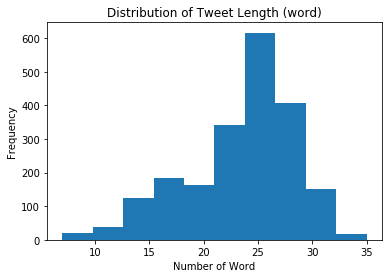

In [62]:
df_master.tweet_length.hist(grid=False)
plt.title('Distribution of Tweet Length (word)')
plt.ylabel('Frequency')
plt.xlabel('Number of Word');

The distribution seems to make sense. Majority of the tweets are about 25 words ranging from 15-30 words

In [63]:
df_master.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'source',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'date_time', 'favorites', 'retweets', 'user_favourites',
       'user_followers', 'jpg_url', 'img_num', 'predictions', 'confidences',
       'gender', 'tweet_length'],
      dtype='object')

Check for null-values, seems like the first 5 columns almost entire columns as null -values, we might consider drop these

In [64]:
df_master.isnull().sum().sort_values(ascending=False)[:10]

in_reply_to_status_id         2036
in_reply_to_user_id           2036
retweeted_status_id           1987
retweeted_status_user_id      1987
retweeted_status_timestamp    1987
predictions                    322
gender                         228
tweet_length                     0
name                             0
source                           0
dtype: int64

In [65]:
df_master.user_followers.value_counts().head()

8943108    285
8943144    209
8943069    201
8943111    173
8943066    145
Name: user_followers, dtype: int64

Does not seems like these retweet_status_timestamp is giving us any information. However, we still need to check other columns

In [66]:
df_master[~df_master.retweeted_status_timestamp.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,favorites,retweets,user_favourites,user_followers,jpg_url,img_num,predictions,confidences,gender,tweet_length
32,885311592912609280,NaN,NaN,Twitter for iPhone,"[rt, dog, rate, this, is, lilly, she, just, pa...",8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,...,0,16291,146211,8943066,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,female,25
67,877611172832227328,NaN,NaN,Twitter for iPhone,"[rt, rachel2195, dog, rate, the, boyfriend, an...",8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,...,0,71,146211,8943066,https://pbs.twimg.com/media/DCszHgmW0AAmIpT.jpg,1,Irish_setter,0.364729,male,23
107,867072653475098625,NaN,NaN,Twitter for iPhone,"[rt, rachaeleasler, these, dog, rate, hat, are...",8.650134e+17,7.874618e+17,2017-05-18 01:17:25 +0000,https://twitter.com/rachaeleasler/status/86501...,13,...,0,108,146211,8943067,https://pbs.twimg.com/media/DAElHfmUMAEH9lB.jpg,1,Blenheim_spaniel,0.352946,unknown,15
130,860924035999428608,NaN,NaN,Twitter for iPhone,"[rt, tallylott, h, ckin, adorable, promposal, ...",8.609145e+17,3.638908e+08,2017-05-06 17:49:42 +0000,https://twitter.com/tallylott/status/860914485...,13,...,0,723,146211,8943066,https://pbs.twimg.com/media/C_KVJjDXsAEUCWn.jpg,2,NaN,0.000000,unknown,14
167,851861385021730816,NaN,NaN,Twitter for iPhone,"[rt, eddie, coe98, thanks, dog, rate, complete...",8.482894e+17,3.410211e+08,2017-04-01 21:42:03 +0000,https://twitter.com/eddie_coe98/status/8482893...,10,...,0,19,146211,8943066,https://pbs.twimg.com/media/C8W6sY_W0AEmttW.jpg,1,NaN,0.000000,unknown,18
182,847971574464610304,NaN,NaN,Twitter for iPhone,"[rt, basic, vacek, i, love, my, new, mug, easy...",8.479710e+17,5.970642e+08,2017-04-01 00:36:55 +0000,https://twitter.com/basic_vacek_/status/847971...,13,...,0,419,146211,8943066,https://pbs.twimg.com/media/C8SZH1EWAAAIRRF.jpg,1,NaN,0.000000,unknown,17
209,841833993020538882,NaN,NaN,Twitter for iPhone,"[rt, dog, rate, this, is, ken, his, cheek, are...",8.174239e+17,4.196984e+09,2017-01-06 17:33:29 +0000,https://twitter.com/dog_rates/status/817423860...,13,...,0,14403,146211,8943067,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,Samoyed,0.201358,male,19
220,839290600511926273,NaN,NaN,Twitter for iPhone,"[rt, alexmartindawg, the, drink, is, dr, puppe...",8.392899e+17,4.119842e+07,2017-03-08 01:41:24 +0000,https://twitter.com/alexmartindawg/status/8392...,10,...,0,139,146211,8943067,https://pbs.twimg.com/media/C6XBt9XXEAEEW9U.jpg,1,NaN,0.000000,NaN,18
223,838916489579200512,NaN,NaN,Twitter for iPhone,"[rt, kibadva, i, collected, all, the, good, do...",8.389060e+17,8.117408e+08,2017-03-07 00:15:46 +0000,https://twitter.com/KibaDva/status/83890598062...,15,...,0,33,146211,8943067,https://pbs.twimg.com/media/C6RkiQZUsAAM4R4.jpg,2,NaN,0.000000,unknown,17
255,832769181346996225,NaN,NaN,Twitter for iPhone,"[rt, emiliegambril, 12, 10, h, cking, excited,...",8.327664e+17,4.871977e+08,2017-02-18 01:39:12 +0000,https://twitter.com/EmilieGambril/status/83276...,12,...,0,38,146211,8943069,https://pbs.twimg.com/media/C46UmzSVMAAqBug.jpg,1,NaN,0.000000,unknown,17


#### Define
in_reply_to_user_id contains one value and drop 
The in_reply_to_status_id,  and retweeted_status_id and retweeted_status_timestamp since we do not need any information about retweeting besides retweet_status_user_id which we will keep

#### Code

In [67]:
df_master.in_reply_to_user_id.nunique() #this needs to be dropped since only one unique value

1

This retweeted_status_user_id still gives us some insight so we will keep it

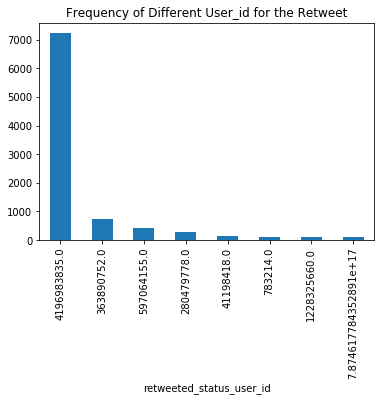

In [69]:
df_master.groupby('retweeted_status_user_id')['retweets'].mean().sort_values(ascending=False).head(8).plot(kind='bar', color = sb.color_palette()[0])
plt.title('Frequency of Different User_id for the Retweet');

In [70]:
df_master = df_master.drop(columns = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_timestamp'])

#### Test

The columns are removed.

In [71]:
df_master.columns

Index(['tweet_id', 'source', 'text', 'retweeted_status_user_id',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'date_time', 'favorites',
       'retweets', 'user_favourites', 'user_followers', 'jpg_url', 'img_num',
       'predictions', 'confidences', 'gender', 'tweet_length'],
      dtype='object')

#### Define 
Drop column without image(jpg_url)

#### Code

In [72]:
df_master = df_master.dropna(subset = ['jpg_url'])

#### Test

In [73]:
df_master.jpg_url.isna().any()

False

#### Define
Check for number of unique values in the column

#### Code / Test

In [74]:
non_include = ['text']
column_to_check = [column for column in df_master.columns.tolist() if column not in non_include]

In [75]:
[(i, df_master[i].nunique()) for i in df_master[column_to_check]]

[('tweet_id', 2059),
 ('source', 3),
 ('retweeted_status_user_id', 13),
 ('expanded_urls', 2059),
 ('rating_numerator', 35),
 ('rating_denominator', 15),
 ('name', 934),
 ('doggo', 2),
 ('floofer', 2),
 ('pupper', 2),
 ('puppo', 2),
 ('date_time', 2059),
 ('favorites', 1830),
 ('retweets', 1552),
 ('user_favourites', 3),
 ('user_followers', 34),
 ('jpg_url', 2000),
 ('img_num', 4),
 ('predictions', 113),
 ('confidences', 1682),
 ('gender', 3),
 ('tweet_length', 29)]

#### Define

Does not seem like we will get information fom user_favourites since there are 2 unique values, so it will be dropped

#### Code

In [76]:
df_master.drop(columns = 'user_favourites',inplace=True)

#### Test

In [77]:
df_master.columns

Index(['tweet_id', 'source', 'text', 'retweeted_status_user_id',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'date_time', 'favorites',
       'retweets', 'user_followers', 'jpg_url', 'img_num', 'predictions',
       'confidences', 'gender', 'tweet_length'],
      dtype='object')

#### Define

Check for duplicate values

#### Code / Test

In [78]:
non_include = ['text']
column_to_check = [column for column in df_master.columns.tolist() if column not in non_include]
df_master[column_to_check].duplicated().any()

False

#### Define

data is being converted to proper datatype and index is being resetted

In [79]:
df_master.dtypes

tweet_id                             int64
source                              object
text                                object
retweeted_status_user_id           float64
expanded_urls                       object
rating_numerator                     int64
rating_denominator                   int64
name                                object
doggo                               object
floofer                             object
pupper                              object
puppo                               object
date_time                   datetime64[ns]
favorites                            int64
retweets                             int64
user_followers                       int64
jpg_url                             object
img_num                              int64
predictions                         object
confidences                        float64
gender                              object
tweet_length                         int64
dtype: object

#### Code

In [80]:
def convert_data_type(data, datatype):
    return data.astype(datatype)

In [81]:
df_master['tweet_id'] = convert_data_type(df_master['tweet_id'], str)
df_master['source'] = convert_data_type(df_master['source'], 'category')
df_master['gender'] = convert_data_type(df_master['gender'], 'category')

#### Test

In [82]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 22 columns):
tweet_id                    2059 non-null object
source                      2059 non-null category
text                        2059 non-null object
retweeted_status_user_id    72 non-null float64
expanded_urls               2059 non-null object
rating_numerator            2059 non-null int64
rating_denominator          2059 non-null int64
name                        2059 non-null object
doggo                       2059 non-null object
floofer                     2059 non-null object
pupper                      2059 non-null object
puppo                       2059 non-null object
date_time                   2059 non-null datetime64[ns]
favorites                   2059 non-null int64
retweets                    2059 non-null int64
user_followers              2059 non-null int64
jpg_url                     2059 non-null object
img_num                     2059 non-null int64
predicti

### Store Cleaned Data into a file

#### Code

In [83]:
df_master.to_csv('./twitter_archive_master.csv', encoding = 'utf-8', index=False)

#### Test

In [84]:
df_master_clean = pd.read_csv('twitter_archive_master.csv')
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 22 columns):
tweet_id                    2059 non-null int64
source                      2059 non-null object
text                        2059 non-null object
retweeted_status_user_id    72 non-null float64
expanded_urls               2059 non-null object
rating_numerator            2059 non-null int64
rating_denominator          2059 non-null int64
name                        2059 non-null object
doggo                       2059 non-null object
floofer                     2059 non-null object
pupper                      2059 non-null object
puppo                       2059 non-null object
date_time                   2059 non-null object
favorites                   2059 non-null int64
retweets                    2059 non-null int64
user_followers              2059 non-null int64
jpg_url                     2059 non-null object
img_num                     2059 non-null int64
predictions        

## Visualization and Analysis

### Visualization : 

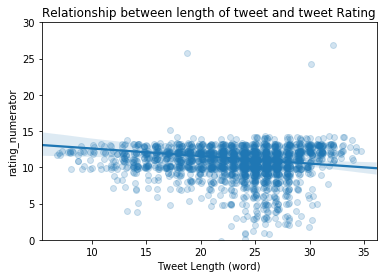

In [89]:
df_master_filtered = df_master_clean.query('rating_numerator <  250')
sb.regplot(data = df_master_filtered, x = 'tweet_length', y = 'rating_numerator', fit_reg = True,
           x_jitter = 0.3, y_jitter = 0.3, scatter_kws = {'alpha' : 1/5})
plt.ylim(0,30)
plt.title('Relationship between length of tweet and tweet Rating')
plt.xlabel('Tweet Length (word)');

### Analysis :

### Visualization : 

In [92]:
df_master_clean.describe()

,tweet_id,retweeted_status_user_id,rating_numerator,rating_denominator,favorites,retweets,user_followers,img_num,confidences,tweet_length
count,2.059000e+03,7.200000e+01,2059.000000,2059.000000,2059.000000,2059.000000,2.059000e+03,2059.000000,2059.000000,2059.000000
mean,7.378345e+17,1.093697e+16,12.263720,10.515299,7776.703254,2496.741622,8.943113e+06,1.203983,0.462350,23.369111
std,6.758411e+16,9.280326e+16,40.838002,7.204775,11753.381297,4363.014143,7.769237e+01,0.563002,0.338944,4.993751
min,6.660209e+17,7.832140e+05,0.000000,2.000000,0.000000,11.000000,8.943066e+06,1.000000,0.000000,7.000000
25%,6.762505e+17,4.196984e+09,10.000000,10.000000,1475.000000,535.500000,8.943071e+06,1.000000,0.139761,20.000000
50%,7.113067e+17,4.196984e+09,11.000000,10.000000,3429.000000,1181.000000,8.943108e+06,1.000000,0.456047,24.000000
75%,7.928986e+17,4.196984e+09,12.000000,10.000000,9695.000000,2866.500000,8.943144e+06,1.000000,0.772554,27.000000
max,8.924206e+17,7.874618e+17,1776.000000,170.000000,151831.000000,75040.000000,8.943773e+06,4.000000,0.999956,35.000000


In [249]:
df_numerical = df_master_clean[['rating_numerator', 'favorites','retweets','user_followers','img_num','confidences','tweet_length']]

In [250]:
def lower_corr_matrix(df):
    '''
    calculate a lower correlated matrix from the dataframe numeric variables
    INPUT
    df - dataframe with numeric variables to examine
    OUTPUT
    df_lt - lower correlated matrix
    '''
    corr_matrix = df.corr().abs()
    np.tril(np.ones(corr_matrix.shape)).astype(np.bool)[0:len(corr_matrix),0:len(corr_matrix)]
    df_lt = corr_matrix.where(np.tril(np.ones(corr_matrix.shape)).astype(np.bool))
    return df_lt

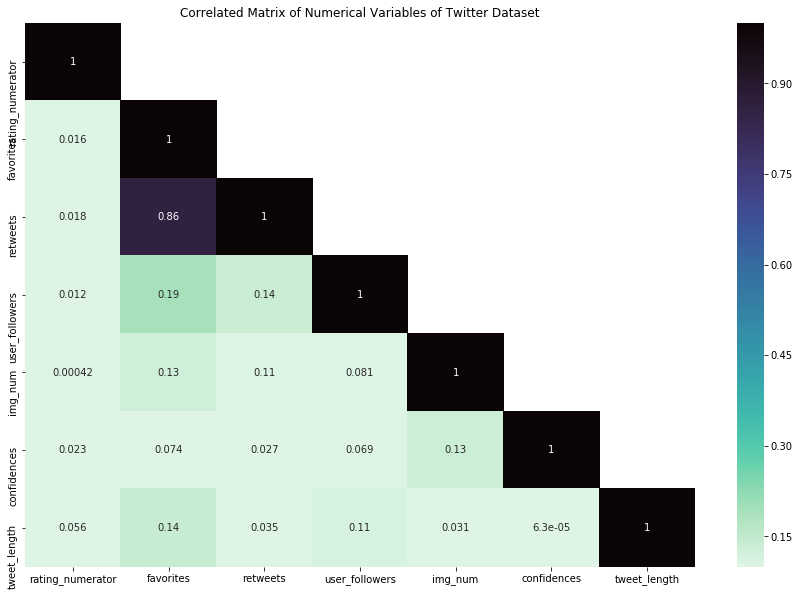

In [251]:
plt.figure(figsize=(15,10))
sb.heatmap(lower_corr_matrix(df_numerical), annot=True, cmap='mako_r', vmin=0.1, vmax = 1)
plt.title('Correlated Matrix of Numerical Variables of Twitter Dataset');

### Visualization :

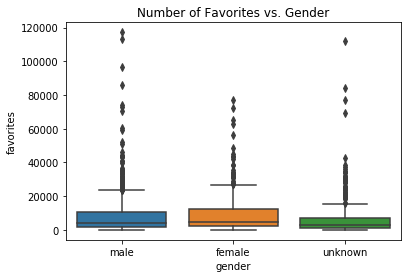

In [96]:
sb.boxplot(x = 'gender', y = 'favorites', data = df_master_clean)
plt.title('Number of Favorites vs. Gender');

### Analysis :

### Visualization :


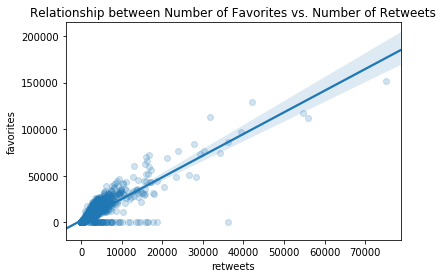

In [97]:
sb.regplot(x = 'retweets', y = 'favorites', data = df_master_clean, fit_reg=True, scatter_kws={'alpha':0.2})
plt.title('Relationship between Number of Favorites vs. Number of Retweets');

In [240]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score

y = df_master['favorites']
X_col = [col for col in df_numerical if col not in ['favorites']]
X = df_numerical[X_col]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)


regr = make_pipeline(StandardScaler(), SVR(kernel='linear'))


regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)



In [241]:
regr.get_params()

{'memory': None,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('svr',
   SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
     kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False))],
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'svr': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
   kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'svr__C': 1.0,
 'svr__cache_size': 200,
 'svr__coef0': 0.0,
 'svr__degree': 3,
 'svr__epsilon': 0.1,
 'svr__gamma': 'auto',
 'svr__kernel': 'linear',
 'svr__max_iter': -1,
 'svr__shrinking': True,
 'svr__tol': 0.001,
 'svr__verbose': False}

In [242]:
r2_score_all = r2_score(y_test, y_pred)
print("\nThe r2_score for SVR is {:0.2f}.\n".format(r2_score_all))


The r2_score for SVR is 0.00.



In [243]:
svr.get_params(deep=True)

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [244]:
y = df_master['favorites']

In [245]:
df_master_clean.columns

Index(['tweet_id', 'source', 'text', 'retweeted_status_user_id',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'date_time', 'favorites',
       'retweets', 'user_followers', 'jpg_url', 'img_num', 'predictions',
       'confidences', 'gender', 'tweet_length'],
      dtype='object')

In [246]:
X_improved = df_master_clean[['retweets']]
X_train_improved, X_test_improved, y_train, y_test = train_test_split(X_improved, y, test_size=0.3, random_state=42)

regr = make_pipeline(StandardScaler(), SVR(kernel='linear'))

regr.fit(X_train_improved, y_train)
y_pred = regr.predict(X_test_improved)

In [247]:
r2_score_SVR = r2_score(y_test, y_pred)
print("\nThe r2_score for SVR is {:0.2f}.\n".format(r2_score_SVR))


The r2_score for SVR is -0.01.



In [248]:
from sklearn.linear_model import Ridge

clf = Ridge(alpha=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
r2_score = r2_score(y_test,y_pred)
print("\nThe r2_score for Ridge Regression is {:0.2f}.\n".format(r2_score))


The r2_score for Ridge Regression is 0.83.

